## This is dividend yield data I downloaded from TD Ameritrade

I'm still learning to play around with pandas and plotting.

- Goals
  - Properly load the csv file
  - clean the df if needed
  - group by exchange
  - find the max and min yield for each exchange
  - plot data using histograms
  - bin the data properly
  - use bin_edges to correctly plot 

In [2]:
# loading in the libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [3]:
# Loading in the dataframe from csv

df = pd.read_excel('dividend_yield.xlsx')
df

,Symbol,Company Name,Market Capitalization,Sector,Industry,Dividend Yield,Beta
0,AAIC-B,Arlington Asset Investment Corp,--,Financials,Mortgage Real Estate Investment Trusts (REITs),0.069930,--
1,AAIC-C,Arlington Asset Investment Corp,--,Financials,Mortgage Real Estate Investment Trusts (REITs),0.081522,--
2,AAT,"American Assets Trust, Inc",2343290000,Real Estate,Equity Real Estate Investment Trusts (REITs),0.030542,1.26403
3,AATC,Autoscope Technologies Corp,43955730,Information Technology,"Electronic Equipment, Instruments & Components",0.058182,1.17708
4,AB,Alliancebernstein Holding LP,5228993510,Financials,Capital Markets,0.065887,1.42399
...,...,...,...,...,...,...,...
1280,XOMAP,XOMA Corp,--,Health Care,Biotechnology,0.081398,--
1281,XRX,Xerox Holdings Corp,3708939080,Information Technology,"Technology Hardware, Storage & Peripherals",0.047170,1.81144
1282,YCBD-A,cbdMD Inc,--,Health Care,Pharmaceuticals,0.112258,--
1283,YY,JOYY Inc (ADR),4998318750,Communication Services,Interactive Media & Services,0.031145,0.85731


In [4]:
# dropping the Company Name
df1 = df
df1.drop('Company Name', axis = 1, inplace = True)

In [5]:
df

,Symbol,Market Capitalization,Sector,Industry,Dividend Yield,Beta
0,AAIC-B,--,Financials,Mortgage Real Estate Investment Trusts (REITs),0.069930,--
1,AAIC-C,--,Financials,Mortgage Real Estate Investment Trusts (REITs),0.081522,--
2,AAT,2343290000,Real Estate,Equity Real Estate Investment Trusts (REITs),0.030542,1.26403
3,AATC,43955730,Information Technology,"Electronic Equipment, Instruments & Components",0.058182,1.17708
4,AB,5228993510,Financials,Capital Markets,0.065887,1.42399
...,...,...,...,...,...,...
1280,XOMAP,--,Health Care,Biotechnology,0.081398,--
1281,XRX,3708939080,Information Technology,"Technology Hardware, Storage & Peripherals",0.047170,1.81144
1282,YCBD-A,--,Health Care,Pharmaceuticals,0.112258,--
1283,YY,4998318750,Communication Services,Interactive Media & Services,0.031145,0.85731


In [6]:
# shortening some column headers

df1.rename({'Market Capitalization': 'marketcap', 'Dividend Yield': 'divyield'}, axis = 1, inplace = True)
df1

,Symbol,marketcap,Sector,Industry,divyield,Beta
0,AAIC-B,--,Financials,Mortgage Real Estate Investment Trusts (REITs),0.069930,--
1,AAIC-C,--,Financials,Mortgage Real Estate Investment Trusts (REITs),0.081522,--
2,AAT,2343290000,Real Estate,Equity Real Estate Investment Trusts (REITs),0.030542,1.26403
3,AATC,43955730,Information Technology,"Electronic Equipment, Instruments & Components",0.058182,1.17708
4,AB,5228993510,Financials,Capital Markets,0.065887,1.42399
...,...,...,...,...,...,...
1280,XOMAP,--,Health Care,Biotechnology,0.081398,--
1281,XRX,3708939080,Information Technology,"Technology Hardware, Storage & Peripherals",0.047170,1.81144
1282,YCBD-A,--,Health Care,Pharmaceuticals,0.112258,--
1283,YY,4998318750,Communication Services,Interactive Media & Services,0.031145,0.85731


In [7]:
# replacing '--' with '0'
df1['marketcap'].replace('--', '0',inplace = True)
df1

,Symbol,marketcap,Sector,Industry,divyield,Beta
0,AAIC-B,0,Financials,Mortgage Real Estate Investment Trusts (REITs),0.069930,--
1,AAIC-C,0,Financials,Mortgage Real Estate Investment Trusts (REITs),0.081522,--
2,AAT,2343290000,Real Estate,Equity Real Estate Investment Trusts (REITs),0.030542,1.26403
3,AATC,43955730,Information Technology,"Electronic Equipment, Instruments & Components",0.058182,1.17708
4,AB,5228993510,Financials,Capital Markets,0.065887,1.42399
...,...,...,...,...,...,...
1280,XOMAP,0,Health Care,Biotechnology,0.081398,--
1281,XRX,3708939080,Information Technology,"Technology Hardware, Storage & Peripherals",0.047170,1.81144
1282,YCBD-A,0,Health Care,Pharmaceuticals,0.112258,--
1283,YY,4998318750,Communication Services,Interactive Media & Services,0.031145,0.85731


In [8]:
# checking the dtypes 
df1.dtypes

Symbol        object
marketcap     object
Sector        object
Industry      object
divyield     float64
Beta          object
dtype: object

In [9]:
# converting the dtypes to int if needed

df1['market_cap'] = df1['marketcap'].astype(object).astype(str).astype(np.int64)

In [10]:
df1.head()

,Symbol,marketcap,Sector,Industry,divyield,Beta,market_cap
0,AAIC-B,0,Financials,Mortgage Real Estate Investment Trusts (REITs),0.069930,--,0
1,AAIC-C,0,Financials,Mortgage Real Estate Investment Trusts (REITs),0.081522,--,0
2,AAT,2343290000,Real Estate,Equity Real Estate Investment Trusts (REITs),0.030542,1.26403,2343290000
3,AATC,43955730,Information Technology,"Electronic Equipment, Instruments & Components",0.058182,1.17708,43955730
4,AB,5228993510,Financials,Capital Markets,0.065887,1.42399,5228993510


In [11]:
df1.dtypes

Symbol         object
marketcap      object
Sector         object
Industry       object
divyield      float64
Beta           object
market_cap      int64
dtype: object

In [12]:
# dropping the extra marketcap column
df1.drop('marketcap', axis = 1, inplace = True )


# 

In [13]:
df1

,Symbol,Sector,Industry,divyield,Beta,market_cap
0,AAIC-B,Financials,Mortgage Real Estate Investment Trusts (REITs),0.069930,--,0
1,AAIC-C,Financials,Mortgage Real Estate Investment Trusts (REITs),0.081522,--,0
2,AAT,Real Estate,Equity Real Estate Investment Trusts (REITs),0.030542,1.26403,2343290000
3,AATC,Information Technology,"Electronic Equipment, Instruments & Components",0.058182,1.17708,43955730
4,AB,Financials,Capital Markets,0.065887,1.42399,5228993510
...,...,...,...,...,...,...
1280,XOMAP,Health Care,Biotechnology,0.081398,--,0
1281,XRX,Information Technology,"Technology Hardware, Storage & Peripherals",0.047170,1.81144,3708939080
1282,YCBD-A,Health Care,Pharmaceuticals,0.112258,--,0
1283,YY,Communication Services,Interactive Media & Services,0.031145,0.85731,4998318750


In [14]:
# Dropping any NaN values mainly from sector and industry as not knowing these will not help much
df1.dropna(inplace = True)

In [15]:
df1

,Symbol,Sector,Industry,divyield,Beta,market_cap
0,AAIC-B,Financials,Mortgage Real Estate Investment Trusts (REITs),0.069930,--,0
1,AAIC-C,Financials,Mortgage Real Estate Investment Trusts (REITs),0.081522,--,0
2,AAT,Real Estate,Equity Real Estate Investment Trusts (REITs),0.030542,1.26403,2343290000
3,AATC,Information Technology,"Electronic Equipment, Instruments & Components",0.058182,1.17708,43955730
4,AB,Financials,Capital Markets,0.065887,1.42399,5228993510
...,...,...,...,...,...,...
1279,XOM,Energy,"Oil, Gas & Consumable Fuels",0.064337,1.41824,229586121490
1280,XOMAP,Health Care,Biotechnology,0.081398,--,0
1281,XRX,Information Technology,"Technology Hardware, Storage & Peripherals",0.047170,1.81144,3708939080
1282,YCBD-A,Health Care,Pharmaceuticals,0.112258,--,0


In [16]:
# meant to replace '--' in Beta
# accidentally stumbled upon the fact that I could have omitted the column name[marketcap] in an earlier step 
# and I would have replaced all values '--' in the entire dataframe. Nice.
df1.replace('--','0',inplace = True)

In [17]:
df1

,Symbol,Sector,Industry,divyield,Beta,market_cap
0,AAIC-B,Financials,Mortgage Real Estate Investment Trusts (REITs),0.069930,0,0
1,AAIC-C,Financials,Mortgage Real Estate Investment Trusts (REITs),0.081522,0,0
2,AAT,Real Estate,Equity Real Estate Investment Trusts (REITs),0.030542,1.26403,2343290000
3,AATC,Information Technology,"Electronic Equipment, Instruments & Components",0.058182,1.17708,43955730
4,AB,Financials,Capital Markets,0.065887,1.42399,5228993510
...,...,...,...,...,...,...
1279,XOM,Energy,"Oil, Gas & Consumable Fuels",0.064337,1.41824,229586121490
1280,XOMAP,Health Care,Biotechnology,0.081398,0,0
1281,XRX,Information Technology,"Technology Hardware, Storage & Peripherals",0.047170,1.81144,3708939080
1282,YCBD-A,Health Care,Pharmaceuticals,0.112258,0,0


In [18]:
# converting beta to float64 and creating a new column
df1['beta'] = df1['Beta'].astype(object).astype(str).astype(np.float64)

# dropping the old column
df1.drop('Beta', axis = 1, inplace = True)

# loading df to make sure we are moving forward
df1

,Symbol,Sector,Industry,divyield,market_cap,beta
0,AAIC-B,Financials,Mortgage Real Estate Investment Trusts (REITs),0.069930,0,0.00000
1,AAIC-C,Financials,Mortgage Real Estate Investment Trusts (REITs),0.081522,0,0.00000
2,AAT,Real Estate,Equity Real Estate Investment Trusts (REITs),0.030542,2343290000,1.26403
3,AATC,Information Technology,"Electronic Equipment, Instruments & Components",0.058182,43955730,1.17708
4,AB,Financials,Capital Markets,0.065887,5228993510,1.42399
...,...,...,...,...,...,...
1279,XOM,Energy,"Oil, Gas & Consumable Fuels",0.064337,229586121490,1.41824
1280,XOMAP,Health Care,Biotechnology,0.081398,0,0.00000
1281,XRX,Information Technology,"Technology Hardware, Storage & Peripherals",0.047170,3708939080,1.81144
1282,YCBD-A,Health Care,Pharmaceuticals,0.112258,0,0.00000


In [19]:
# checking the dtypes again
df1.dtypes

Symbol         object
Sector         object
Industry       object
divyield      float64
market_cap      int64
beta          float64
dtype: object

Graph for Symbol: total = 863


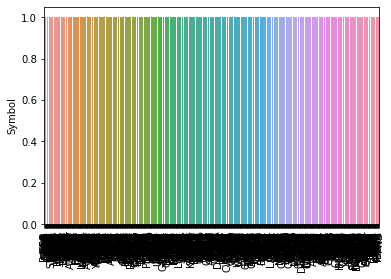

<Figure size 432x1440 with 0 Axes>

Graph for Sector: total = 11


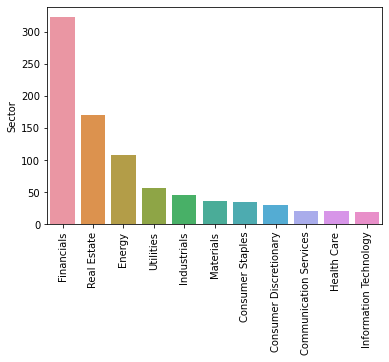

<Figure size 432x1440 with 0 Axes>

Graph for Industry: total = 62


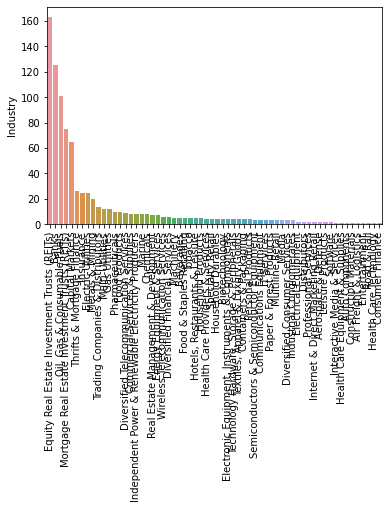

<Figure size 432x1440 with 0 Axes>

Graph for divyield: total = 855


KeyboardInterrupt: 

In [23]:
for i in df1.columns:
    cat_num = df1[i].value_counts()
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    chart = sb.barplot(x = cat_num.index , y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [24]:
# takes x and y as inputs but can be just x
sb.barplot(x = 'Sector',data = df1)


TypeError: Horizontal orientation requires numeric `x` variable.